# Visualizing Earnings Based On College Majors - Exploratory Data Visualization
Learn how to use pandas to quickly create visualizations
* To practice your visualization skills
* How to use pandas and matplotlib together
* How to adjust your plots for readability

## 1. Introduction

In this course, we've been creating plots using pyplot and matplotlib directly. When we want to explore a new dataset by quickly creating visualizations, using these tools directly can be cumbersome. Thankfully, pandas has many methods for quickly generating common plots from data in DataFrames. Like pyplot, the plotting functionality in pandas is a wrapper for matplotlib. This means we can customize the plots when necessary by accessing the underlying Figure, Axes, and other matplotlib objects.

In this guided project, we'll explore how using the pandas plotting functionality along with the Jupyter notebook interface allows us to explore data quickly using visualizations.

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

* **Rank** - Rank by median earnings (the dataset is ordered by this column).
* **Major_code** - Major code.
* **Major** - Major description.
* **Major_category** - Category of major.
* **Total** - Total number of people with major.
* **Sample_size** - Sample size (unweighted) of full-time.
* **Men** - Male graduates.
* **Women** - Female graduates.
* **ShareWomen** - Women as share of total.
* **Employed** - Number employed.
* **Median** - Median salary of full-time, year-round workers.
* **Low_wage_jobs** - Number in low-wage service jobs.
* **Full_time** - Number employed 35 hours or more.
* **Part_time** - Number employed less than 35 hours.

Using visualizations, we can start to explore questions from the dataset like:

* Do students in more popular majors make more money?
    * Using scatter plots
* How many majors are predominantly male? Predominantly female?
    * Using histograms
* Which category of majors have the most students?
    * Using bar plots

We'll explore how to do these and more while primarily working in pandas. Before we start creating data visualizations, let's import the libraries we need and remove rows containing null values.

### Instructions

* Let's setup the environment by importing the libraries we need and running the necessary Jupyter magic so that plots are displayed inline.
    * Import pandas and matplotlib into the environment.
    * Run the Jupyter magic **%matplotlib inline** so that plots are displayed inline.

* Read the dataset into a DataFrame and start exploring the data.
    * Read **recent-grads.csv** into pandas and assign the resulting DataFrame to **recent_grads**.
    * Use **DataFrame.iloc[]** to return the first row formatted as a table.
    * Use **DataFrame.head()** and **DataFrame.tail()** to become familiar with how the data is structured.
    * Use [DataFrame.describe()](http://pandas.pydata.org/pandas-docs/stable/basics.html#summarizing-data-describe) to generate summary statistics for all of the numeric columns.

* Drop rows with missing values. Matplotlib expects that columns of values we pass in have matching lengths and missing values will cause matplotlib to throw errors.
    * Look up the number of rows in **recent_grads** and assign the value to **raw_data_count**.
        Use **DataFrame.dropna()** to drop rows containing missing values and assign the resulting DataFrame back to **recent_grads**.
    * Look up the number of rows in **recent_grads** now and assign the value to **cleaned_data_count**. If you compare **cleaned_data_count** and **raw_data_count**, you'll notice that only one row contained missing values and was dropped.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Suppress warnings
import warnings 
warnings.simplefilter('ignore')

recent_grads = pd.read_csv('data/recent-grads.csv')
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [2]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [3]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [4]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [5]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

In [6]:
raw_data_count = len(recent_grads)
raw_data_count

173

In [7]:
recent_grads = recent_grads.dropna()
cleaned_data_count = len(recent_grads)
cleaned_data_count

dropped_rows = raw_data_count - cleaned_data_count
dropped_rows

1

## 2. Pandas, Scatter Plots

Most of the plotting functionality in pandas is contained within the [DataFrame.plot()](http://pandas.pydata.org/pandas-docs/version/0.19.0/generated/pandas.DataFrame.plot.html) method. When we call this method, we specify the data we want plotted as well as the type of plot. We use the **kind** parameter to specify the type of plot we want. We use **x** and **y** to specify the data we want on each axis. You can read about the different parameters in the [documentation](http://pandas.pydata.org/pandas-docs/version/0.19.0/generated/pandas.DataFrame.plot.html).

    recent_grads.plot(x='Sample_size', y='Employed', kind='scatter')

If you create a new cell in jupyter notebook and run the above code, the scatter plot will be displayed immediately. This functionality is a byproduct of running the jupyter magic **%matplotlib inline**. This means we can write one line of code to generate a scatter plot, run the cell using a keyboard shortcut, inspect the plot, and repeat. The **DataFrame.plot()** method has a few parameters we can use for tweaking the scatter plot:

    recent_grads.plot(x='Sample_size', y='Employed', 
                    kind='scatter', 
                    title='Employed vs. Sample_size', 
                    figsize=(5,10))

We can access the underlying matplotlib Axes object by assigning the return value to a variable:

    ax = recent_grads.plot(x='Sample_size', y='Employed', kind='scatter')
    ax.set_title('Employed vs. Sample_size')

When you run the code above in a jupyter notebook cell, the plot will be returned inline just like before.

### Instructions

* Generate scatter plots in separate jupyter notebook cells to explore the following relations:
    * **Sample_size** and **Median**
    * **Sample_size** and **Unemployment_rate**
    * **Full_time** and **Median**
    * **ShareWomen** and **Unemployment_rate**
    * **Men** and **Median**
    * **Women** and Median**
* Use the plots to explore the following questions:
    * Do students in more popular majors make more money?
    * Do students that majored in subjects that were majority female make more money?
    * Is there any link between the number of full-time employees and median salary?

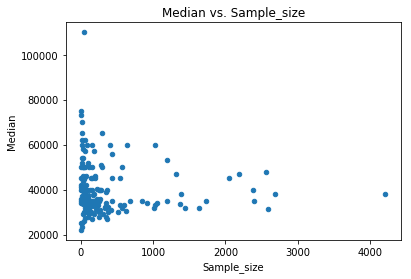

In [8]:
ax = recent_grads.plot(x='Sample_size', y='Median', kind='scatter')
ax.set_title('Median vs. Sample_size')
ax.figsize=(5,10)
plt.show()

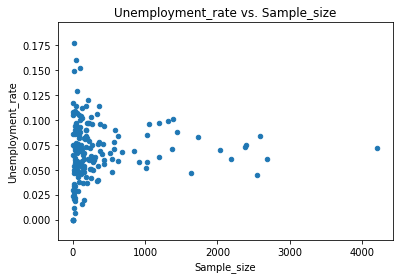

In [9]:
ax = recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')
ax.set_title('Unemployment_rate vs. Sample_size')
ax.figsize=(5,10)
plt.show()

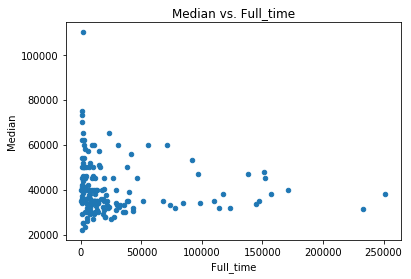

In [10]:
ax = recent_grads.plot(x='Full_time', y='Median', kind='scatter')
ax.set_title('Median vs. Full_time')
ax.figsize=(5,10)
plt.show()

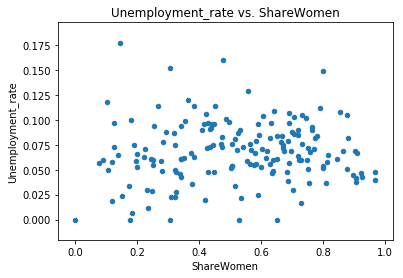

In [11]:
ax = recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')
ax.set_title('Unemployment_rate vs. ShareWomen')
ax.figsize=(5,10)
plt.show()

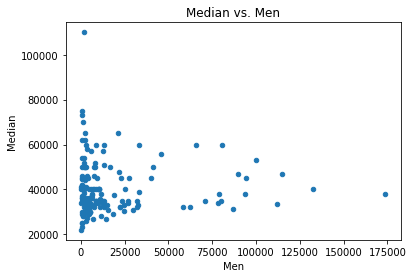

In [12]:
ax = recent_grads.plot(x='Men', y='Median', kind='scatter')
ax.set_title('Median vs. Men')
ax.figsize=(5,10)
plt.show()

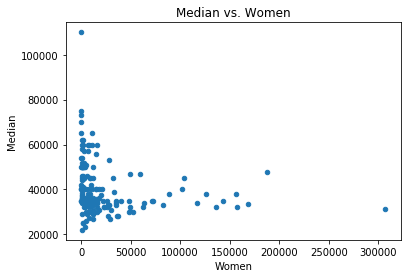

In [13]:
ax = recent_grads.plot(x='Women', y='Median', kind='scatter')
ax.set_title('Median vs. Women')
ax.figsize=(5,10)
plt.show()

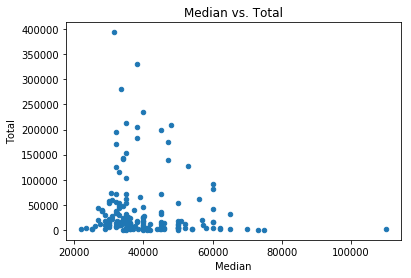

In [14]:
ax = recent_grads.plot(x='Median', y='Total', kind='scatter')
ax.set_title('Median vs. Total')
ax.figsize=(5,10)
plt.show()

* Do students in more popular majors make more money?
    * Only in the range of 30,000 to 50,000 USD

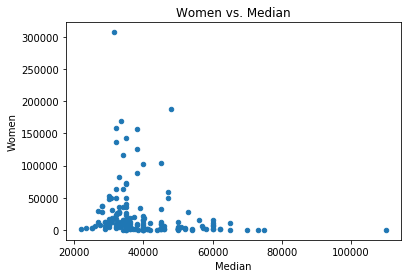

In [15]:
ax = recent_grads.plot(x='Median', y='Women', kind='scatter')
ax.set_title('Women vs. Median')
ax.figsize=(5,10)
plt.show()

* Do students that majored in subjects that were majority female make more money?
    * In the range of 25,000 to 50,000 USD there seem to be a higher number of majority female

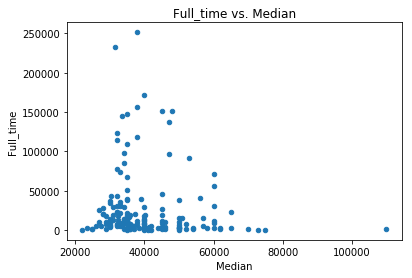

In [16]:
ax = recent_grads.plot(x='Median', y='Full_time', kind='scatter')
ax.set_title('Full_time vs. Median')
ax.figsize=(5,10)
plt.show()

* Is there any link between the number of full-time employees and median salary?
    * In the range 30,000 to 50,000 USD there seem to be kind of a bell curve showing Full time influence

## 3. Pandas, Histograms

To explore the distribution of values in a column, we can select it from the DataFrame, call [Series.plot()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html), and set the **kind** parameter to **hist**:

    recent_grads['Sample_size'].plot(kind='hist')

The **DataFrame.plot()** and **Series.plot(**) methods have many of the same parameters but are used for different use cases. We use **Series.plot()** to plot a specific column and **DataFrame.plot()** to generate plots that use values from multiple columns. For example, because scatter plots are generated using 2 sets of values (one for each axis), we can't create a scatter plot using **Series.plot()**.

Unfortunately, **Series.plot()** doesn't contain parameters for tweaking a histogram because it was implemented to handle generating standard plots with default settings quickly. If we want to control the binning strategy of a histogram, we should use [Series.hist()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.hist.html) instead, which contains parameters specific to customizing histograms:

    recent_grads['Sample_size'].hist(bins=25, range=(0,5000))

### Instructions

* Generate histograms in separate jupyter notebook cells to explore the distributions of the following columns:
    * **Sample_size**
    * **Median**
    * **Employed**
    * **Full_time**
    * **ShareWomen**
    * **Unemployment_rate**
    * **Men**
    * **Women**
* We encourage you to experiment with different bin sizes and ranges when generating these histograms.
* Use the plots to explore the following questions:
    * What percent of majors are predominantly male? Predominantly female?
    * What's the most common median salary range? -> 35,000 USD

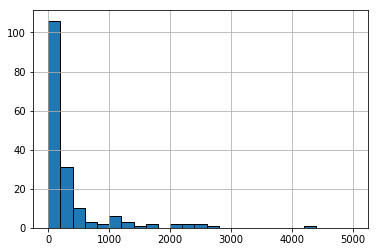

In [17]:
recent_grads['Sample_size'].hist(bins=25, range=(0,5000), edgecolor='black');

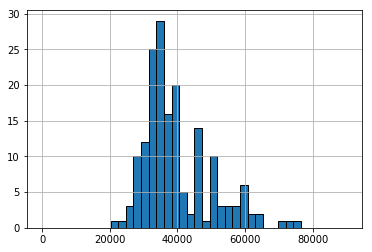

In [18]:
recent_grads['Median'].hist(bins=40, range=(0,90000), edgecolor='black');

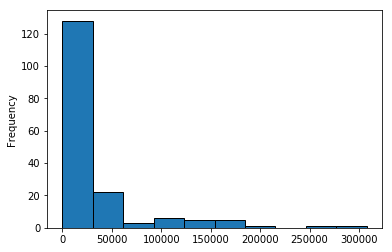

In [19]:
recent_grads['Employed'].plot(kind='hist', edgecolor='black');

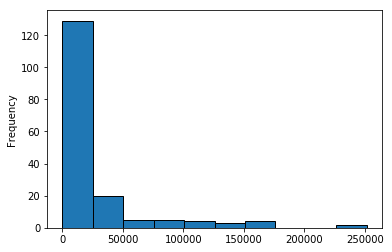

In [21]:
recent_grads['Full_time'].plot(kind='hist', edgecolor='black');
    

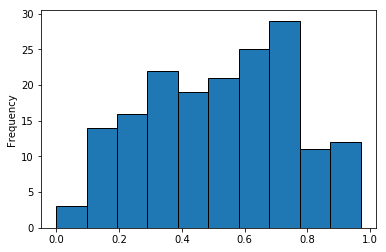

In [22]:
recent_grads['ShareWomen'].plot(kind='hist', edgecolor='black');

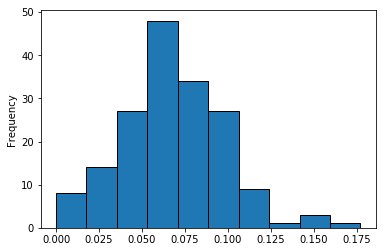

In [23]:
recent_grads['Unemployment_rate'].plot(kind='hist', edgecolor='black');

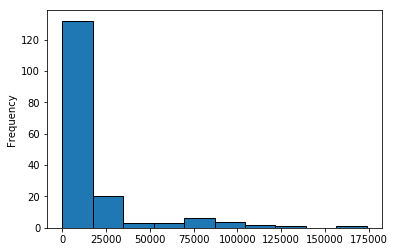

In [24]:
recent_grads['Men'].plot(kind='hist', edgecolor='black');

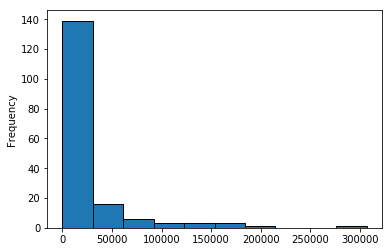

In [25]:
recent_grads['Women'].plot(kind='hist', edgecolor='black');

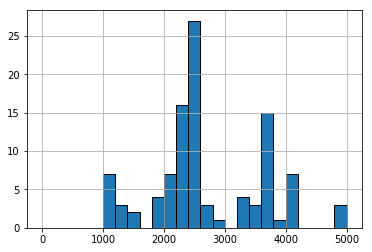

In [26]:
recent_grads['Major_code'].hist(bins=25, range=(0,5000), edgecolor='black');

## 4. Pandas, Scatter Matrix Plot

In the last 2 steps, we created individual scatter plots to visualize potential relationships between columns and histograms to visualize the distributions of individual columns. A **scatter matrix plot** combines both scatter plots and histograms into one grid of plots and allows us to explore potential relationships and distributions simultaneously. A scatter matrix plot consists of **n** by **n** plots on a grid, where **n** is the number of columns, the plots on the diagonal are histograms, and the non-diagonal plots are scatter plots.

![](pics/matrix_plot.png)

Because scatter matrix plots are frequently used in the exploratory data analysis, pandas contains a function named **scatter_matrix()** that generates the plots for us. This function is part of the **pandas.tools.plotting** module and needs to be imported separately. To generate a scatter matrix plot for 2 columns, select just those 2 columns and pass the resulting DataFrame into the **scatter_matrix()** function.

    scatter_matrix(recent_grads[['Women', 'Men']], figsize=(10,10))

While passing in a DataFrame with 2 columns returns a 2 by 2 scatter matrix plot (4 plots total), passing in one with 3 returns a 3 by 3 scatter matrix plot (9 plots total). This means that the number of plots generated scales exponentially by a factor of 2, not linearly. If you increase the number of columns to 4 or more, the resulting grid of plots becomes unreadable and difficult to interpret (even if you increase the plotting area using the **figsize** parameter).

Unfortunately, the documentation for **scatter_matrix()** is missing from the pandas website. If you want to read more about the parameters the function accepts, read the comments in the [source code for the function](https://github.com/pandas-dev/pandas/blob/master/pandas/tools/plotting.py).

### Instructions

* Import **scatter_matri**x from **pandas.tools.plotting**
* Create a 2 by 2 scatter matrix plot using the **Sample_size** and **Median** columns.
* Create a 3 by 3 scatter matrix plot using the **Sample_size**, **Median**, and **Unemployment_rate** columns.
* Explore the questions from the last few steps using these scatter matrix plots. You may need to create more scatter matrix plots.

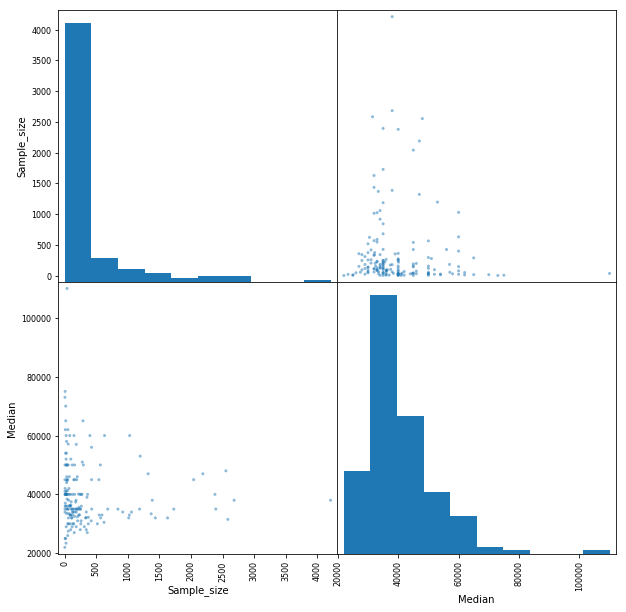

In [27]:
from pandas.tools.plotting import scatter_matrix
p = scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))
plt.show()

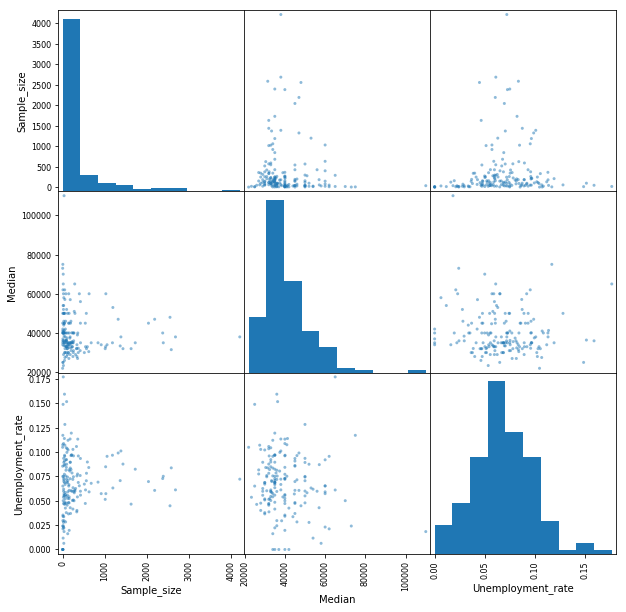

In [28]:
p = scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))
plt.show()

## 5. Pandas, Bar Plots

To create bar plots in matplotlib, we had to specify many aspects of the bar plot ourselves. We had to specify the locations, labels, lengths, and widths of the bars. When creating bar plots using pandas, we only need specify the data we want the bars to represent and the labels for each bar. The following code returns a bar plot of the first 5 values in the **Women** column:

    recent_grads[:5]['Women'].plot(kind='bar')

By default, pandas will use the default labels on the x-axis for each bar (**1** to **n**) from matplotlib. If we instead use the [DataFrame.plot.bar()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.bar.html) method, we can use the **x** parameter to specify the labels and the **y** parameter to specify the data for the bars:

    recent_grads[:5].plot.bar(x='Major', y='Women')

### Instructions

* Use bar plots to compare the percentages of women (**ShareWomen**) from the 10 highest paying majors and from the 10 lowest paying majors.
* Use bar plots to compare the unemployment rate (**Unemployment_rate**) from the 10 highest paying majors and from the 10 lowest paying majors.

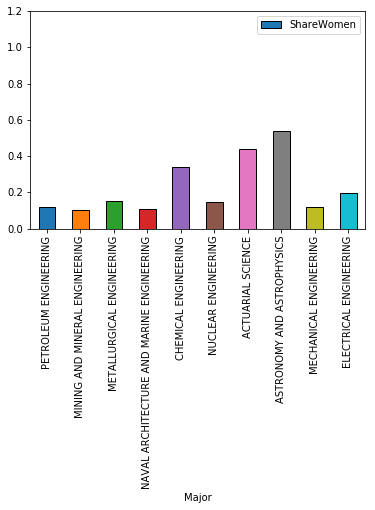

In [29]:
f = recent_grads[:10].plot.bar(x='Major', y='ShareWomen', edgecolor='black', ylim=(0,1.2))
plt.show()

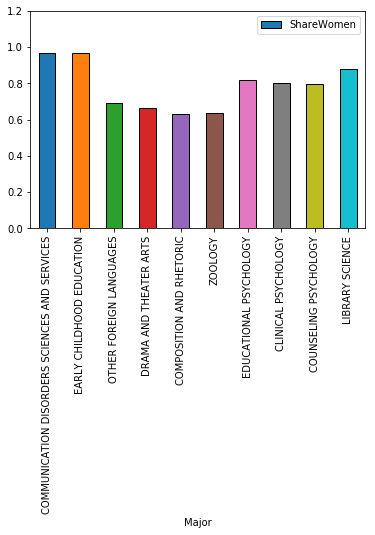

In [30]:
p = recent_grads[-10:].plot.bar(x='Major', y='ShareWomen', edgecolor='black', ylim=(0,1.2))
plt.show()

**There is a higher share of women working in the lower paid majors than in the higher paid majors**

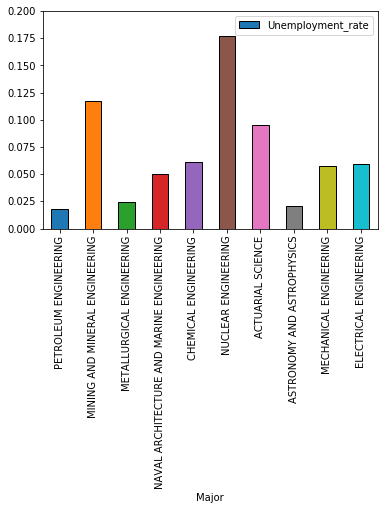

In [31]:
p = recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate', edgecolor='black', ylim=(0,0.2))
plt.show()

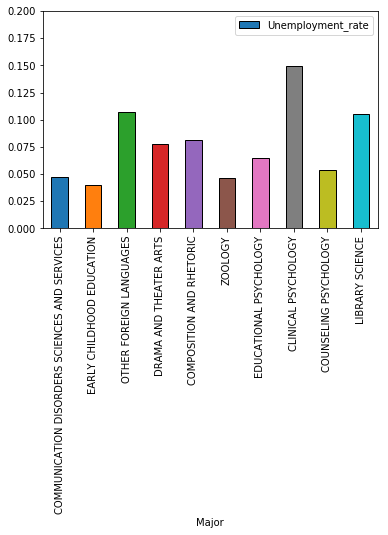

In [32]:
p = recent_grads[-10:].plot.bar(x='Major', y='Unemployment_rate', edgecolor='black', ylim=(0,0.2))
plt.show()

**There is a trend to a higher unemployment rate in the lower paid majors than in the higher paid majors**

## 6. Next Steps

In this guided project, we learned how to use the plotting tools built into pandas to explore data on job outcomes. If you head over to the documentation on [plotting in pandas](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html), you'll notice that there's built in support for many more plots.

We encourage you to keep exploring these other visualizations on your own. Here are some ideas:

* Use a grouped bar plot to compare the number of men with the number of women in each category of majors.
* Use a box plot to explore the distributions of median salaries and unemployment rate.
* Use a hexagonal bin plot to visualize the columns that had dense scatter plots from earlier in the project.